Reasearch figures template

# Salish Sea NEMO Model Daily Nowcast Figures - Tracers and Currents

# Set-up

In [1]:
from __future__ import division

import datetime
from glob import glob
import os

from IPython.core.display import HTML
import netCDF4 as nc

from salishsea_tools.nowcast import figures

%matplotlib inline

In [2]:
def results_dataset(period, grid, results_dir):
    """Return the results dataset for period (e.g. 1h or 1d)
    and grid (e.g. grid_T, grid_U) from results_dir.
    """
    filename_pattern = 'SalishSea_{period}_*_{grid}.nc'
    filepaths = glob(os.path.join(results_dir, filename_pattern.format(period=period, grid=grid)))
    return nc.Dataset(filepaths[0])

In [3]:
run_date = datetime.date.today()

# Results dataset location
results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'
results_dir = os.path.join(results_home, run_date.strftime('%d%b%y').lower())

Load the results datasets:

In [4]:
grid_T_dy = results_dataset('1d', 'grid_T', results_dir)
grid_T_hr = results_dataset('1h', 'grid_T', results_dir)
grid_U_dy = results_dataset('1d', 'grid_U', results_dir)
grid_V_dy = results_dataset('1d', 'grid_V', results_dir)

In [5]:
bathy = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

Display the figures:

In [6]:
HTML('<h2>{:%d%b%y} Figures</h2>'.format(run_date))

## Daily Averaged Fields

To do: Remove this section and add to TracersCurrents_Template.ipynb

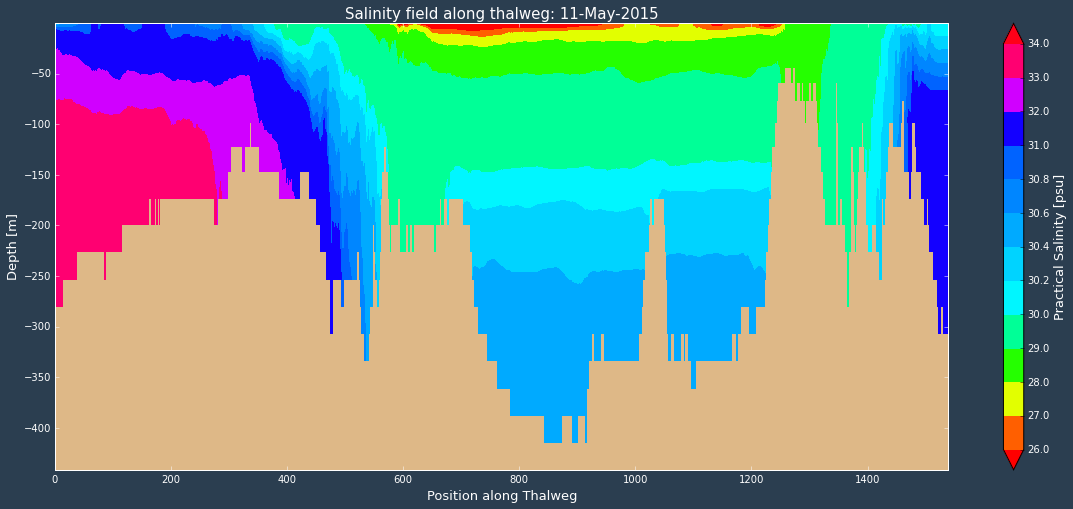

In [7]:
reload(figures)
fig = figures.thalweg_salinity(grid_T_dy)

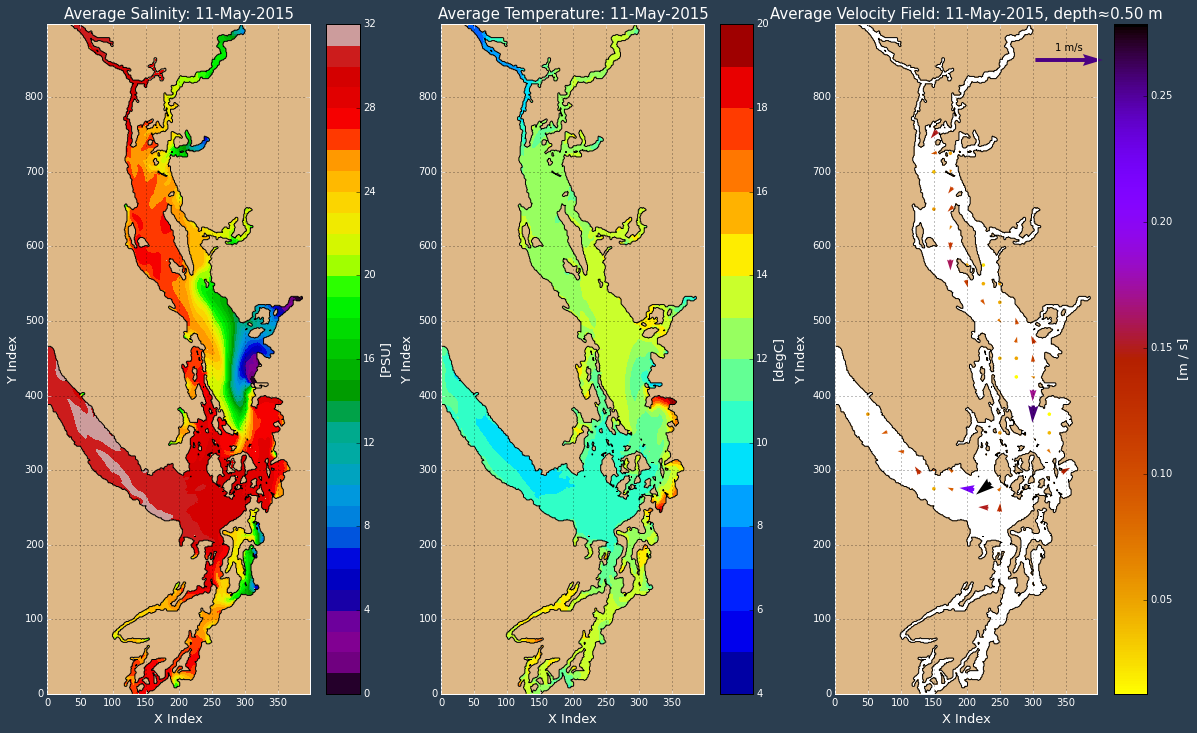

In [8]:
reload(figures)
fig = figures.plot_surface(grid_T_dy, grid_U_dy, grid_V_dy, bathy)

xmin=0, xmax=398, ymin=0, ymax=898

## VENUS

Observations are from the VENUS State of the Ocean website. http://venus.uvic.ca/research/state-of-the-ocean/

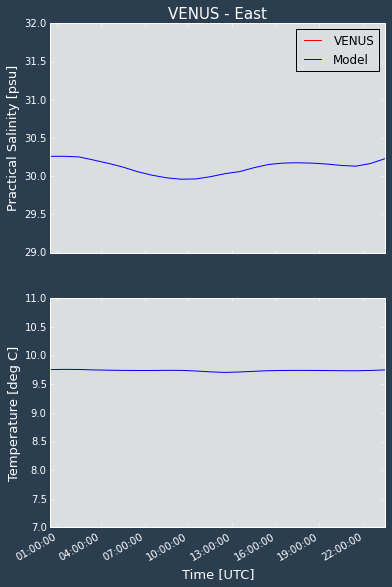

In [9]:
reload(figures)
fig = figures.compare_VENUS('East', grid_T_hr, bathy)

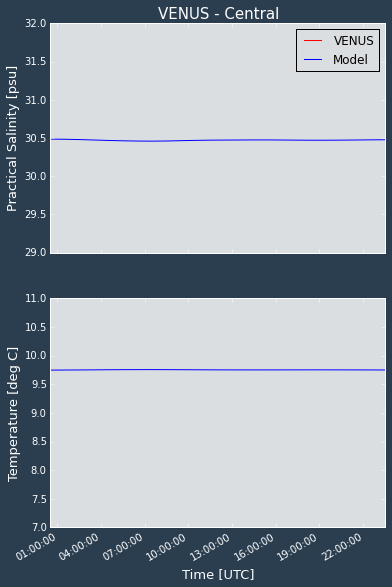

In [10]:
fig = figures.compare_VENUS('Central', grid_T_hr, bathy)